In [1]:
import numpy as np
import random as rnd
import matplotlib.pyplot as plt

In [2]:
# These are some functions you might find useful.
# *cleanText*:  makes the string of characters all uppercase, 
# removes extra spaces, turns punctuation into spaces and 
# removes all other characters which are not A-Z including numbers
#
# *addCounts*: Sums up the frequency of each adjacent letter pair in the text. 
# This can be used to calculate the needed conditional probabilities.

def okChar(c): # make sure character is in the range we expect. Just a double check.
    if ((('A' <= c) and (c<='Z')) or (c==' ')):
        return True
    return False

def cleanText(data):
    data=data.upper()
    makeSpacesChar=[',','!','?',';','.',':']  # characters to change to spaces
    for i in range(10):
        makeSpacesChar.append(str(i))  # add all of the numbers to the list
    for c in makeSpacesChar:
        data=data.replace(c,' ')  # Replace each characters with a space
    data=' '.join(data.split()) # Remove extra spaces 
    onlyGoodChar=[c for c in data if ((c<='Z') and (c>='A')) or (c==' ')] # Remove all characters who are not A-Z or Space
    data=''.join(onlyGoodChar)
    return data

def addCounts(pairDictionary,data): 
    # counts the number of times c1 followed by c2 appears in text 
    # notice that keys that don't appear are missing. You should understand 
    # those to be zero counts 
    for i in range(len(data)-1):
        c1=data[i]
        c2=data[i+1]
        if  ( okChar(c1) and okChar(c2)) :
            key=(c1,c2)
            if key in pairDictionary: # Check to see if key=(c1,c2) is already there
                pairDictionary[key]+=1 # if it is add 
            else:
                pairDictionary[key]=1

def addLetterCounts(letterDictionary,data):
    for c in data:
        if okChar(c):
            if c in letterDictionary:
                letterDictionary[c]+=1
            else:
                letterDictionary[c]=1


In [3]:
# Add put whatever plan text files you want to make you frequency table out of
fileNames=["emma.txt","heart_of_darkness.txt","roger_ackroyd.txt",
           "the_war_of_the_worlds.txt","the_jungle.txt","THE_PROBLEMS_OF_PHILOSOPHY.txt",
           "The_Sun_Also_Rises.txt","the_war_of_the_worlds.txt","The_Souls_of_Black_Folk.txt",
           "Walden.txt"
           ]

pairDictionary={} # initialize empty pair dictionary

letterDictionary={} # for each letter count the number of times it appears

directory="Data/"
for fileName in fileNames: #cycle over the file names
    with open(directory+fileName, 'r') as file:
        data = file.read().replace('\n', '')
    data=cleanText(data)
    addCounts(pairDictionary,data) # aff the counts for the current file loaded
    addLetterCounts(letterDictionary,data) # adding counts of data

file_tag = open("encoded.txt", "r") # read in encoded message
encoded_text=file_tag.read()
file_tag.close()

In [4]:
print(letterDictionary['M'])
print(pairDictionary[('Q','U')])

95194
3675


In [5]:
# calculating conditional probabilities

def calculateConditionalProbailities(pairDictionary, letterDictionary):
    conditionalProbDictionary={} # initialize empty dictionary

    # generate all possible pairs of letters
    pairList = []
    for i in range(26):
        for j in range(26):
            pairList.append((chr(i+65), chr(j+65)))

    # appending ' ' to the pairList
    for i in range(26):
        pairList.append((' ', chr(i+65)))
        pairList.append((chr(i+65), ' '))


    for key in pairList:
        if key in pairDictionary:
            post = key[0]
            pre = key[1]
            conditionalProbDictionary[key] = pairDictionary[key] / letterDictionary[pre]
        else:
            conditionalProbDictionary[key] = 0

    return conditionalProbDictionary
        


In [6]:
conditionalProbabilityDict = calculateConditionalProbailities(pairDictionary, letterDictionary)

print(conditionalProbabilityDict[('Q', ' ')], conditionalProbabilityDict[('Q', 'U')])

0 0.03467929905351464


In [7]:
def log_likelihood(text, conditionalProbabilityDict):
    running_log_likelihood = 0

    epsilon = np.exp(-16) # small P to avoid log(0)
    log_epsilon = np.log(epsilon)
    abs_log_epsilon = np.abs(log_epsilon)

    for i in range(0, len(text)-1):
        logProb = np.log(conditionalProbabilityDict[(text[i], text[i+1])])
        abs_logProb = np.abs(logProb)
        current_log_likelihood = np.min([abs_logProb, abs_log_epsilon])
        running_log_likelihood += current_log_likelihood
    
    return -1 * running_log_likelihood

In [8]:
# create a random codebook
def randomCodebook():
    alpha=[chr(c) for c in range(ord('A'),ord('A')+26)] # create a list with A to Z 
    alpha2=alpha.copy() # Start with every letter mapping to itself
    rnd.shuffle(alpha2) # shuffles the letter around to create a random permutation
    codeBook={ a:code for a,code in zip(alpha,alpha2) } # Make a dictionary
    return codeBook

def randSwapInCodeBook(codeBook):
    o=rnd.sample([k for k in codeBook],k=2)
    tmp=codeBook[o[0]]
    codeBook[o[0]]=codeBook[o[1]]
    codeBook[o[1]]=tmp

codebook=randomCodebook()
# print(codebook)

for (a,b) in codebook.items():
    print(f'{a} -> {b}')

A -> L
B -> R
C -> J
D -> S
E -> N
F -> D
G -> P
H -> O
I -> A
J -> I
K -> K
L -> V
M -> M
N -> G
O -> Z
P -> X
Q -> T
R -> U
S -> B
T -> Q
U -> H
V -> W
W -> E
X -> C
Y -> F
Z -> Y


In [9]:
# apply the codebook to the encoded text

def applyCodeBook(text,code_book):
    out=[]
    for c in text:
        if c==' ': # just keep spaces as spaces
            out.append(' ')
        elif okChar(c): # if not ok, we just skip it.
            out.append(code_book[c])
    s=""
    return s.join(out)

text="in the land of the blind, the one eyed person is king"
text=text.upper() # make upper case

encrypted_text=applyCodeBook(text,codebook)

print(f"Original Text: {text}")
print(f"Encrypted Text: {encrypted_text}")

Original Text: IN THE LAND OF THE BLIND, THE ONE EYED PERSON IS KING
Encrypted Text: AG QON VLGS ZD QON RVAGS QON ZGN NFNS XNUBZG AB KAGP


In [10]:
# swap two random letters in the codebook

In [11]:
# log_likelihood(text, conditionalProbabilityDict):

def metropolis_step(current_codebook, current_text, current_log_likelihood, conditionalProbabilityDict):
    proposed_codebook = current_codebook.copy()
    randSwapInCodeBook(proposed_codebook)

    proposed_text = applyCodeBook(encoded_text, proposed_codebook)

    # current_log_likelihood = log_likelihood(current_text, conditionalProbabilityDict)
    proposed_log_likelihood = log_likelihood(proposed_text, conditionalProbabilityDict)

    acceptance_ratio = np.exp(proposed_log_likelihood - current_log_likelihood)

    acceptance_probability = np.min([1, acceptance_ratio])

    if rnd.random() < acceptance_probability:
        return proposed_codebook, proposed_text, proposed_log_likelihood
    else:
        return current_codebook, current_text, current_log_likelihood

In [12]:
def runMetropolisAlgorithm(initialCodebook, initial_text, initial_log_likehood, log_likelihood_array, steps=3000):

    directory="Data/"
    for fileName in fileNames: #cycle over the file names
        with open(directory+fileName, 'r') as file:
            data = file.read().replace('\n', '')
        data=cleanText(data)
        addCounts(pairDictionary,data) # aff the counts for the current file loaded
        addLetterCounts(letterDictionary,data) # adding counts of data

    file_tag = open("encoded.txt", "r") # read in encoded message
    encoded_text=file_tag.read()
    file_tag.close()

    # codebook=randomCodebook()
    codebook = initialCodebook
    # current_text = applyCodeBook(encoded_text, codebook)
    current_text = initial_text
    # current_log_likelihood = log_likelihood(current_text, conditionalProbabilityDict)
    current_log_likelihood = initial_log_likehood
    log_likelihood_array.append(current_log_likelihood)

    for i in range(steps):
        codebook, current_text, current_log_likelihood = metropolis_step(codebook, current_text, current_log_likelihood, conditionalProbabilityDict)
        log_likelihood_array.append(current_log_likelihood)
        print(f'Iteration {i}: {current_log_likelihood}')
    
    #show decoded text
    return codebook, log_likelihood_array

In [13]:
directory="Data/"
for fileName in fileNames: #cycle over the file names
    with open(directory+fileName, 'r') as file:
        data = file.read().replace('\n', '')
    data=cleanText(data)
    addCounts(pairDictionary,data) # aff the counts for the current file loaded
    addLetterCounts(letterDictionary,data) # adding counts of data

file_tag = open("encoded.txt", "r") # read in encoded message
encoded_text=file_tag.read()
file_tag.close()

initial_codebook = randomCodebook()
initial_text = applyCodeBook(encoded_text, initial_codebook)
empty_log_likelihood_array = []
initial_log_likelihood = log_likelihood(initial_text, conditionalProbabilityDict)

new = runMetropolisAlgorithm(initial_codebook, initial_text, initial_log_likelihood, empty_log_likelihood_array, steps=3000)


/var/folders/91/nz1r31690rb_44hz9hkx_3rm0000gn/T/ipykernel_52128/930857222.py:9: RuntimeWarning: divide by zero encountered in log
  logProb = np.log(conditionalProbabilityDict[(text[i], text[i+1])])
/var/folders/91/nz1r31690rb_44hz9hkx_3rm0000gn/T/ipykernel_52128/2569695612.py:12: RuntimeWarning: overflow encountered in exp
  acceptance_ratio = np.exp(proposed_log_likelihood - current_log_likelihood)


Iteration 0: -38137.89152413394
Iteration 1: -36861.35490053282
Iteration 2: -36861.35490053282
Iteration 3: -36662.035176072895
Iteration 4: -36662.035176072895
Iteration 5: -36662.035176072895
Iteration 6: -36392.01446958244
Iteration 7: -36273.5206999227
Iteration 8: -36273.5206999227
Iteration 9: -33508.662113495826
Iteration 10: -33508.662113495826
Iteration 11: -33508.662113495826
Iteration 12: -32805.29480736428
Iteration 13: -32805.29480736428
Iteration 14: -32805.29480736428
Iteration 15: -32287.232791795945
Iteration 16: -32287.232791795945
Iteration 17: -31956.983151444663
Iteration 18: -31151.99984905539
Iteration 19: -31151.99984905539
Iteration 20: -31151.99984905539
Iteration 21: -31151.99984905539
Iteration 22: -31151.99984905539
Iteration 23: -31151.99984905539
Iteration 24: -31151.99984905539
Iteration 25: -31061.36425221108
Iteration 26: -30717.945567278053
Iteration 27: -30717.945567278053
Iteration 28: -30444.365832503994
Iteration 29: -30444.365832503994
Iteration

In [ ]:
# show final decoded text

decrypted_text=applyCodeBook(encoded_text,new)

print(f"Decrypted Text: {decrypted_text}")


Decrypted Text: WHEN IN THE COURSE OF HUMAN EVENTS IT BECOMES NECESSARY FOR ONE PEOPLE TO DISSOLVE THE POLITICAL BANDS WHICH HAVE CONNECTED THEM WITH ANOTHER AND TO ASSUME AMONG THE POWERS OF THE EARTH THE SEPARATE AND EQUAL STATION TO WHICH THE LAWS OF NATURE AND OF NATURES GOD ENTITLE THEM A DECENT RESPECT TO THE OPINIONS OF MANKIND REQUIRES THAT THEY SHOULD DECLARE THE CAUSES WHICH IMPEL THEM TO THE SEPARATION WE HOLD THESE TRUTHS TO BE SELFEVIDENT THAT ALL MEN ARE CREATED EQUAL THAT THEY ARE ENDOWED BY THEIR CREATOR WITH CERTAIN UNALIENABLE RIGHTS THAT AMONG THESE ARE LIFE LIBERTY AND THE PURSUIT OF HAPPINESS THAT TO SECURE THESE RIGHTS GOVERNMENTS ARE INSTITUTED AMONG MEN DERIVING THEIR JUST POWERS FROM THE CONSENT OF THE GOVERNED THAT WHENEVER ANY FORM OF GOVERNMENT BECOMES DESTRUCTIVE OF THESE ENDS IT IS THE RIGHT OF THE PEOPLE TO ALTER OR TO ABOLISH IT AND TO INSTITUTE NEW GOVERNMENT LAYING ITS FOUNDATION ON SUCH PRINCIPLES AND ORGANIZING ITS POWERS IN SUCH FORM AS TO THEM SHAL

Decrypted Text: `WHEN IN THE COURSE OF HUMAN EVENTS IT BECOMES NECESSARY FOR ONE PEOPLE TO DISSOLVE THE POLITICAL BANDS WHICH HAVE CONNECTED THEM WITH ANOTHER AND TO ASSUME AMONG THE POWERS OF THE EARTH THE SEPARATE AND EQUAL STATION TO WHICH THE LAWS OF NATURE AND OF NATURES GOD ENTITLE THEM A DECENT RESPECT TO THE OPINIONS OF MANKIND REQUIRES THAT THEY SHOULD DECLARE THE CAUSES WHICH IMPEL THEM TO THE SEPARATION WE HOLD THESE TRUTHS TO BE SELFEVIDENT THAT ALL MEN ARE CREATED EQUAL THAT THEY ARE ENDOWED BY THEIR CREATOR WITH CERTAIN UNALIENABLE RIGHTS THAT AMONG THESE ARE LIFE LIBERTY AND THE PURSUIT OF HAPPINESS THAT TO SECURE THESE RIGHTS GOVERNMENTS ARE INSTITUTED AMONG MEN DERIVING THEIR JUST POWERS FROM THE CONSENT OF THE GOVERNED THAT WHENEVER ANY FORM OF GOVERNMENT BECOMES DESTRUCTIVE OF THESE ENDS IT IS THE RIGHT OF THE PEOPLE TO ALTER OR TO ABOLISH IT AND TO INSTITUTE NEW GOVERNMENT LAYING ITS FOUNDATION ON SUCH PRINCIPLES AND ORGANIZING ITS POWERS IN SUCH FORM AS TO THEM SHALL SEEM MOST LIKELY TO EFFECT THEIR SAFETY AND HAPPINESS PRUDENCE INDEED WILL DICTATE THAT GOVERNMENTS LONG ESTABLISHED SHOULD NOT BE CHANGED FOR LIGHT AND TRANSIENT CAUSES AND ACCORDINGLY ALL EXPERIENCE HATH SHOWN THAT MANKIND ARE MORE DISPOSED TO SUFFER WHILE EVILS ARE SUFFERABLE THAN TO RIGHT THEMSELVES BY ABOLISHING THE FORMS TO WHICH THEY ARE ACCUSTOMED BUT WHEN A LONG TRAIN OF ABUSES AND USURPATIONS PURSUING INVARIABLY THE SAME OBJECT EVINCES A DESIGN TO REDUCE THEM UNDER ABSOLUTE DESPOTISM IT IS THEIR RIGHT IT IS THEIR DUTY TO THROW OFF SUCH GOVERNMENT AND TO PROVIDE NEW GUARDS FOR THEIR FUTURE SECURITY SUCH HAS BEEN THE PATIENT SUFFERANCE OF THESE COLONIES AND SUCH IS NOW THE NECESSITY WHICH CONSTRAINS THEM TO ALTER THEIR FORMER SYSTEMS OF GOVERNMENT THE HISTORY OF THE PRESENT KING OF GREAT BRITAIN IS A HISTORY OF REPEATED INJURIES AND USURPATIONS ALL HAVING IN DIRECT OBJECT THE ESTABLISHMENT OF AN ABSOLUTE TYRANNY OVER THESE STATES TO PROVE THIS LET FACTS BE SUBMITTED TO A CANDID WORLD HE HAS REFUSED HIS ASSENT TO LAWS THE MOST WHOLESOME AND NECESSARY FOR THE PUBLIC GOOD HE HAS FORBIDDEN HIS GOVERNORS TO PASS LAWS OF IMMEDIATE AND PRESSING IMPORTANCE UNLESS SUSPENDED IN THEIR OPERATIONS TILL HIS ASSENT SHOULD BE OBTAINED AND WHEN SO SUSPENDED HE HAS UTTERLY NEGLECTED TO ATTEND TO THEM HE HAS REFUSED TO PASS OTHER LAWS FOR THE ACCOMMODATION OF LARGE DISTRICTS OF PEOPLE UNLESS THOSE PEOPLE WOULD RELINQUISH THE RIGHT OF REPRESENTATION IN THE LEGISLATURE A RIGHT INESTIMABLE TO THEM AND FORMIDABLE TO TYRANTS ONLY HE HAS CALLED TOGETHER LEGISLATIVE BODIES AT PLACES UNUSUAL UNCOMFORTABLE AND DISTANT FROM THE DEPOSITORY OF THEIR PUBLIC RECORDS FOR THE SOLE PURPOSE OF FATIGUING THEM INTO COMPLIANCE WITH HIS MEASURES HE HAS DISSOLVED REPRESENTATIVE HOUSES REPEATEDLY FOR OPPOSING WITH MANLY FIRMNESS HIS INVASIONS ON THE RIGHTS OF THE PEOPLE HE HAS REFUSED FOR A LONG TIME AFTER SUCH DISSOLUTIONS TO CAUSE OTHERS TO BE ELECTED WHEREBY THE LEGISLATIVE POWERS INCAPABLE OF ANNIHILATION HAVE RETURNED TO THE PEOPLE AT LARGE FOR THEIR EXERCISE THE STATE REMAINING IN THE MEANTIME EXPOSED TO ALL THE DANGERS OF INVASION FROM WITHOUT AND CONVULSIONS WITHIN HE HAS ENDEAVORED TO PREVENT THE POPULATION OF THESE STATES FOR THAT PURPOSE OBSTRUCTING THE LAWS FOR NATURALIZATION OF FOREIGNERS REFUSING TO PASS OTHERS TO ENCOURAGE THEIR MIGRATIONS HITHER AND RAISING THE CONDITIONS OF NEW APPROPRIATIONS OF LANDS HE HAS OBSTRUCTED THE ADMINISTRATION OF JUSTICE BY REFUSING HIS ASSENT TO LAWS FOR ESTABLISHING JUDICIARY POWERS HE HAS MADE JUDGES DEPENDENT ON HIS WILL ALONE FOR THE TENURE OF THEIR OFFICES AND THE AMOUNT AND PAYMENT OF THEIR SALARIES HE HAS ERECTED A MULTITUDE OF NEW OFFICES AND SENT HITHER SWARMS OF OFFICERS TO HARASS OUR PEOPLE AND EAT OUT THEIR SUBSTANCE HE HAS KEPT AMONG US IN TIMES OF PEACE STANDING ARMIES WITHOUT THE CONSENT OF OUR LEGISLATURES HE HAS AFFECTED TO RENDER THE MILITARY INDEPENDENT OF AND SUPERIOR TO THE CIVIL POWER HE HAS COMBINED WITH OTHERS TO SUBJECT US TO A JURISDICTION FOREIGN TO OUR CONSTITUTION AND UNACKNOWLEDGED BY OUR LAWS GIVING HIS ASSENT TO THEIR ACTS OF PRETENDED LEGISLATION FOR QUARTERING LARGE BODIES OF ARMED TROOPS AMONG US FOR PROTECTING THEM BY A MOCK TRIAL FROM PUNISHMENT FOR ANY MURDERS WHICH THEY SHOULD COMMIT ON THE INHABITANTS OF THESE STATES FOR CUTTING OFF OUR TRADE WITH ALL PARTS OF THE WORLD FOR IMPOSING TAXES ON US WITHOUT OUR CONSENT FOR DEPRIVING US IN MANY CASES OF THE BENEFITS OF TRIAL BY JURY FOR TRANSPORTING US BEYOND SEAS TO BE TRIED FOR PRETENDED OFFENCES FOR ABOLISHING THE FREE SYSTEM OF ENGLISH LAWS IN A NEIGHBORING PROVINCE ESTABLISHING THEREIN AN ARBITRARY GOVERNMENT AND ENLARGING ITS BOUNDARIES SO AS TO RENDER IT AT ONCE AN EXAMPLE AND FIT INSTRUMENT FOR INTRODUCING THE SAME ABSOLUTE RULE INTO THESE COLONIES FOR TAKING AWAY OUR CHARTERS ABOLISHING OUR MOST VALUABLE LAWS AND ALTERING FUNDAMENTALLY THE FORMS OF OUR GOVERNMENTS FOR SUSPENDING OUR OWN LEGISLATURES AND DECLARING THEMSELVES INVESTED WITH POWER TO LEGISLATE FOR US IN ALL CASES WHATSOEVER HE HAS ABDICATED GOVERNMENT HERE BY DECLARING US OUT OF HIS PROTECTION AND WAGING WAR AGAINST US HE HAS PLUNDERED OUR SEAS RAVAGED OUR COASTS BURNT OUR TOWNS AND DESTROYED THE LIVES OF OUR PEOPLE HE IS AT THIS TIME TRANSPORTING LARGE ARMIES OF FOREIGN MERCENARIES TO COMPLETE THE WORKS OF DEATH DESOLATION AND TYRANNY ALREADY BEGUN WITH CIRCUMSTANCES OF CRUELTY AND PERFIDY SCARCELY PARALLELED IN THE MOST BARBAROUS AGES AND TOTALLY UNWORTHY THE HEAD OF A CIVILIZED NATION HE HAS CONSTRAINED OUR FELLOWCITIZENS TAKEN CAPTIVE ON THE HIGH SEAS TO BEAR ARMS AGAINST THEIR COUNTRY TO BECOME THE EXECUTIONERS OF THEIR FRIENDS AND BRETHREN OR TO FALL THEMSELVES BY THEIR HANDS HE HAS EXCITED DOMESTIC INSURRECTIONS AMONGST US AND HAS ENDEAVORED TO BRING ON THE INHABITANTS OF OUR FRONTIERS THE MERCILESS INDIAN SAVAGES WHOSE KNOWN RULE OF WARFARE IS AN UNDISTINGUISHED DESTRUCTION OF ALL AGES SEXES AND CONDITIONS IN EVERY STAGE OF THESE OPPRESSIONS WE HAVE PETITIONED FOR REDRESS IN THE MOST HUMBLE TERMS OUR REPEATED PETITIONS HAVE BEEN ANSWERED ONLY BY REPEATED INJURY A PRINCE WHOSE CHARACTER IS THUS MARKED BY EVERY ACT WHICH MAY DEFINE A TYRANT IS UNFIT TO BE THE RULER OF A FREE PEOPLE NOR HAVE WE BEEN WANTING IN ATTENTIONS TO OUR BRITISH BRETHREN WE HAVE WARNED THEM FROM TIME TO TIME OF ATTEMPTS BY THEIR LEGISLATURE TO EXTEND AN UNWARRANTABLE JURISDICTION OVER US WE HAVE REMINDED THEM OF THE CIRCUMSTANCES OF OUR EMIGRATION AND SETTLEMENT HERE WE HAVE APPEALED TO THEIR NATIVE JUSTICE AND MAGNANIMITY AND WE HAVE CONJURED THEM BY THE TIES OF OUR COMMON KINDRED TO DISAVOW THESE USURPATIONS WHICH WOULD INEVITABLY INTERRUPT OUR CONNECTIONS AND CORRESPONDENCE THEY TOO HAVE BEEN DEAF TO THE VOICE OF JUSTICE AND OF CONSANGUINITY WE MUST THEREFORE ACQUIESCE IN THE NECESSITY WHICH DENOUNCES OUR SEPARATION AND HOLD THEM AS WE HOLD THE REST OF MANKIND ENEMIES IN WAR IN PEACE FRIENDS WE THEREFORE THE REPRESENTATIVES OF THE UNITED STATES OF AMERICA IN GENERAL CONGRESS ASSEMBLED APPEALING TO THE SUPREME JUDGE OF THE WORLD FOR THE RECTITUDE OF OUR INTENTIONS DO IN THE NAME AND BY THE AUTHORITY OF THE GOOD PEOPLE OF THESE COLONIES SOLEMNLY PUBLISH AND DECLARE THAT THESE UNITED COLONIES ARE AND OF RIGHT OUGHT TO BE FREE AND INDEPENDENT STATES THAT THEY ARE ABSOLVED FROM ALL ALLEGIANCE TO THE BRITISH CROWN AND THAT ALL POLITICAL CONNECTION BETWEEN THEM AND THE STATE OF GREAT BRITAIN IS AND OUGHT TO BE TOTALLY DISSOLVED AND THAT AS FREE AND INDEPENDENT STATES THEY HAVE FULL POWER TO LEVY WAR CONCLUDE PEACE CONTRACT ALLIANCES ESTABLISH COMMERCE AND TO DO ALL OTHER ACTS AND THINGS WHICH INDEPENDENT STATES MAY OF RIGHT DO AND FOR THE SUPPORT OF THIS DECLARATION WITH A FIRM RELIANCE ON THE PROTECTION OF DIVINE PROVIDENCE WE MUTUALLY PLEDGE TO EACH OTHER OUR LIVES OUR FORTUNES AND OUR SACRED HONOUR`


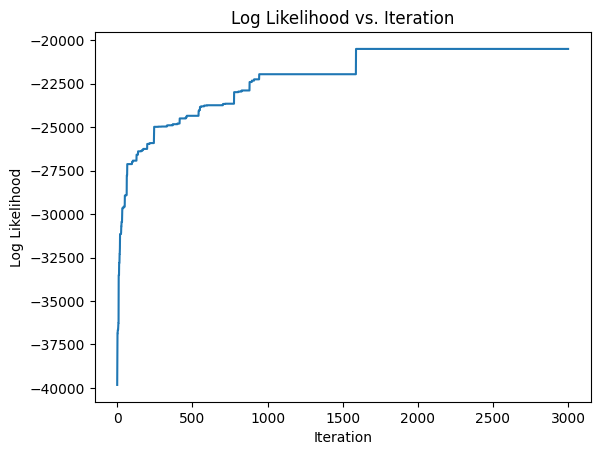

In [19]:
# plot the log likelihood array

plt.plot(empty_log_likelihood_array)
plt.xlabel('Iteration')
plt.ylabel('Log Likelihood')
plt.title('Log Likelihood vs. Iteration')
plt.show()

